Dataset loaded successfully. Displaying the first 5 rows and info:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  

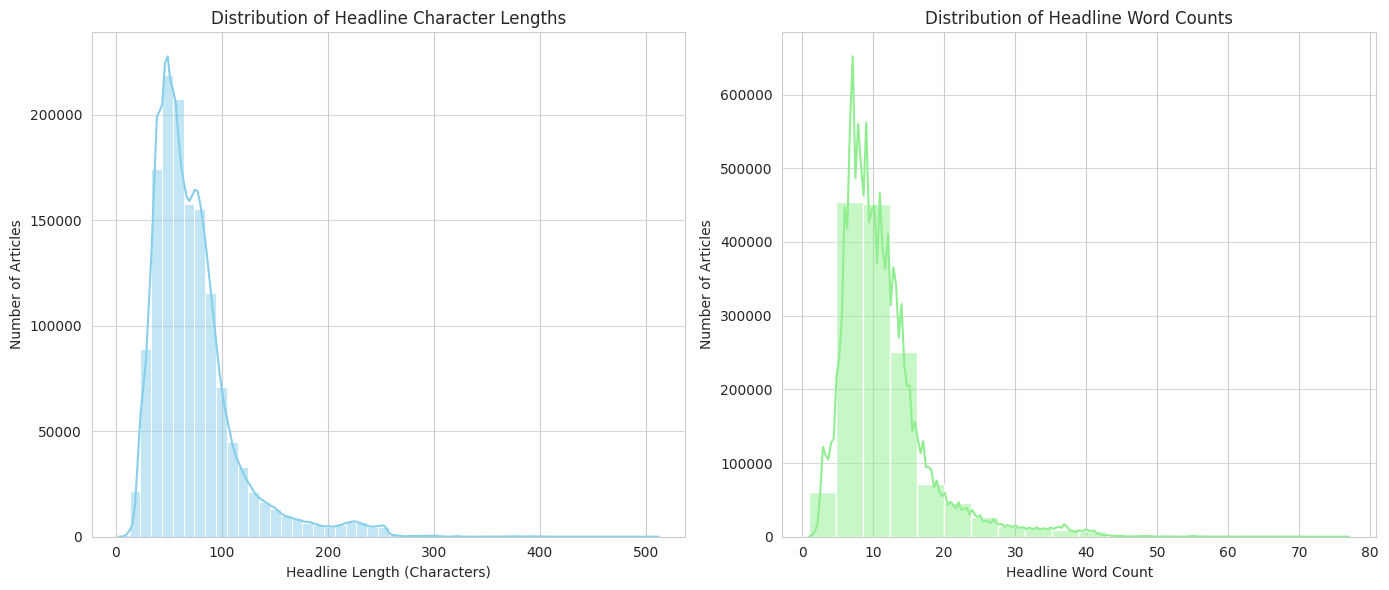

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")

# --- Error Handling for File Loading ---
try:
    # Attempt to load the dataset from 'raw_analyst_ratings.csv'
    df = pd.read_csv('../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')
    print("Dataset loaded successfully. Displaying the first 5 rows and info:")
    print(df.head())
    print("\n")
    df.info()
except FileNotFoundError:
    # If the file isn't found, print an error message and exit the script
    print("Error: 'raw_analyst_ratings.csv' not found.")
    exit() # Terminate execution as we can't proceed without the data
except Exception as e:
    # Catch any other potential errors during file loading (e.g., corrupted CSV)
    print(f"An unexpected error occurred while loading the dataset: {e}")
    exit() # Terminate execution

print("\n--- Starting Headline Length Analysis (Character and Word Counts) ---")
# Check if 'headline' column exists before proceeding
if 'headline' in df.columns:
    # Calculate the length of each headline (number of characters)
    df['headline_char_length'] = df['headline'].apply(len)

    # Calculate the number of words in each headline
    df['headline_word_count'] = df['headline'].str.split().apply(len)

    # Get and print descriptive statistics for headline character lengths
    print("\nDescriptive Statistics for Headline Character Length:")
    print(df['headline_char_length'].describe())

    # Get and print descriptive statistics for headline word counts
    print("\nDescriptive Statistics for Headline Word Count:")
    print(df['headline_word_count'].describe())

    # --- Visualize both character and word counts in a single figure with subplots ---
    plt.figure(figsize=(14, 6)) # Adjust figure size to accommodate two plots

    # Subplot 1: Distribution of Headline Character Lengths
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.histplot(df['headline_char_length'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Headline Character Lengths')
    plt.xlabel('Headline Length (Characters)')
    plt.ylabel('Number of Articles')
    plt.grid(axis='y', alpha=0.75)

    # Subplot 2: Distribution of Headline Word Counts
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.histplot(df['headline_word_count'], bins=20, kde=True, color='lightgreen')
    plt.title('Distribution of Headline Word Counts')
    plt.xlabel('Headline Word Count')
    plt.ylabel('Number of Articles')
    plt.grid(axis='y', alpha=0.75)

    plt.tight_layout() # Adjust layout to prevent subplots from overlapping
    plt.show()

else:
    # If 'headline' column is missing, inform the user
    print("Warning: 'headline' column not found in the dataset. Skipping headline length analysis.")


--- Starting Publisher Analysis ---

Top 10 Most Active Publishers (Articles per Publisher):
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


/tmp/ipykernel_10246/1786667087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(10).index, y=publisher_counts.head(10).values, palette='viridis')


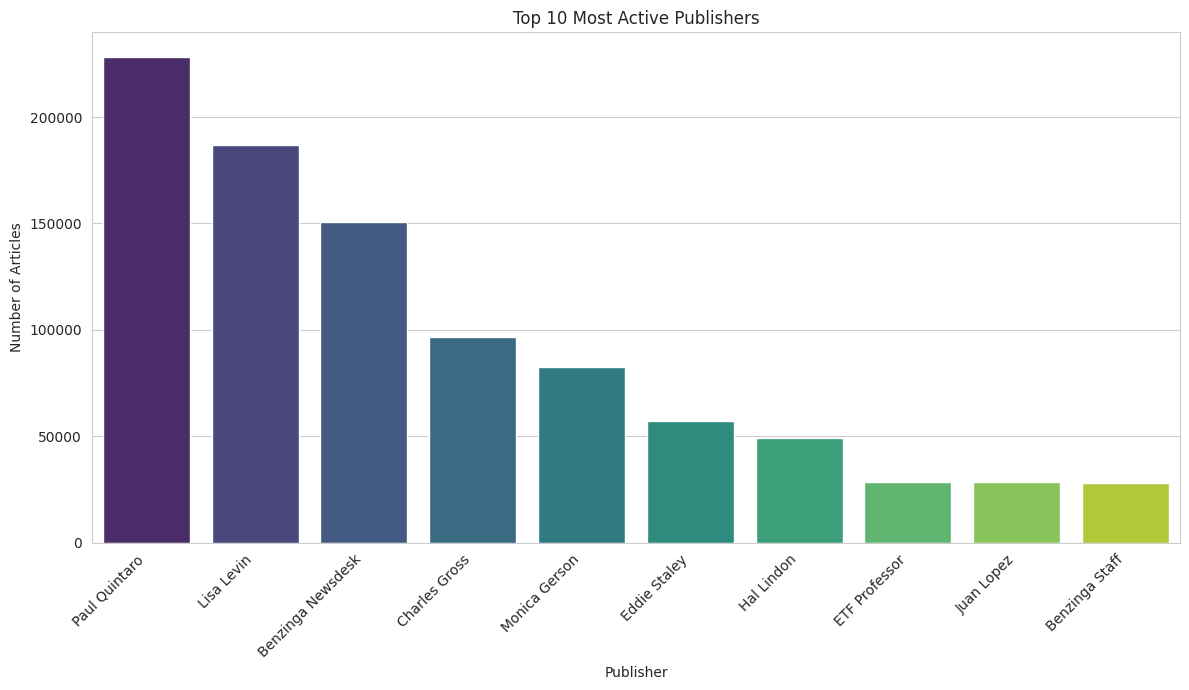

In [2]:
print("\n--- Starting Publisher Analysis ---")
if 'publisher' in df.columns:
    # Count the occurrences of each unique publisher to find the most active ones
    publisher_counts = df['publisher'].value_counts()

    print("\nTop 10 Most Active Publishers (Articles per Publisher):")
    # Display the top 10 publishers and their article counts
    print(publisher_counts.head(10))

    # --- Optional: Visualize top N publishers ---
    plt.figure(figsize=(12, 7))
    # Create a bar plot for the top 10 publishers
    sns.barplot(x=publisher_counts.head(10).index, y=publisher_counts.head(10).values, palette='viridis')
    plt.title('Top 10 Most Active Publishers')
    plt.xlabel('Publisher')
    plt.ylabel('Number of Articles')
    # Rotate x-axis labels for better readability if publisher names are long
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    # If 'publisher' column is missing, inform the user
    print("Warning: 'publisher' column not found in the dataset. Skipping publisher analysis.")


--- Starting Publication Date Analysis ---
Successfully converted 'date' column to datetime objects.

Articles per Day (first 10 days with data):
publication_day
2009-02-14    1
2009-04-27    2
2009-04-29    1
2009-05-22    1
2009-05-27    6
2009-05-29    2
2009-05-30    3
2009-06-01    5
2009-06-02    2
2009-06-05    6
Name: count, dtype: int64

Articles per Day (last 10 days with data):
publication_day
2020-06-02    544
2020-06-03    789
2020-06-04    538
2020-06-05    932
2020-06-06     11
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, dtype: int64


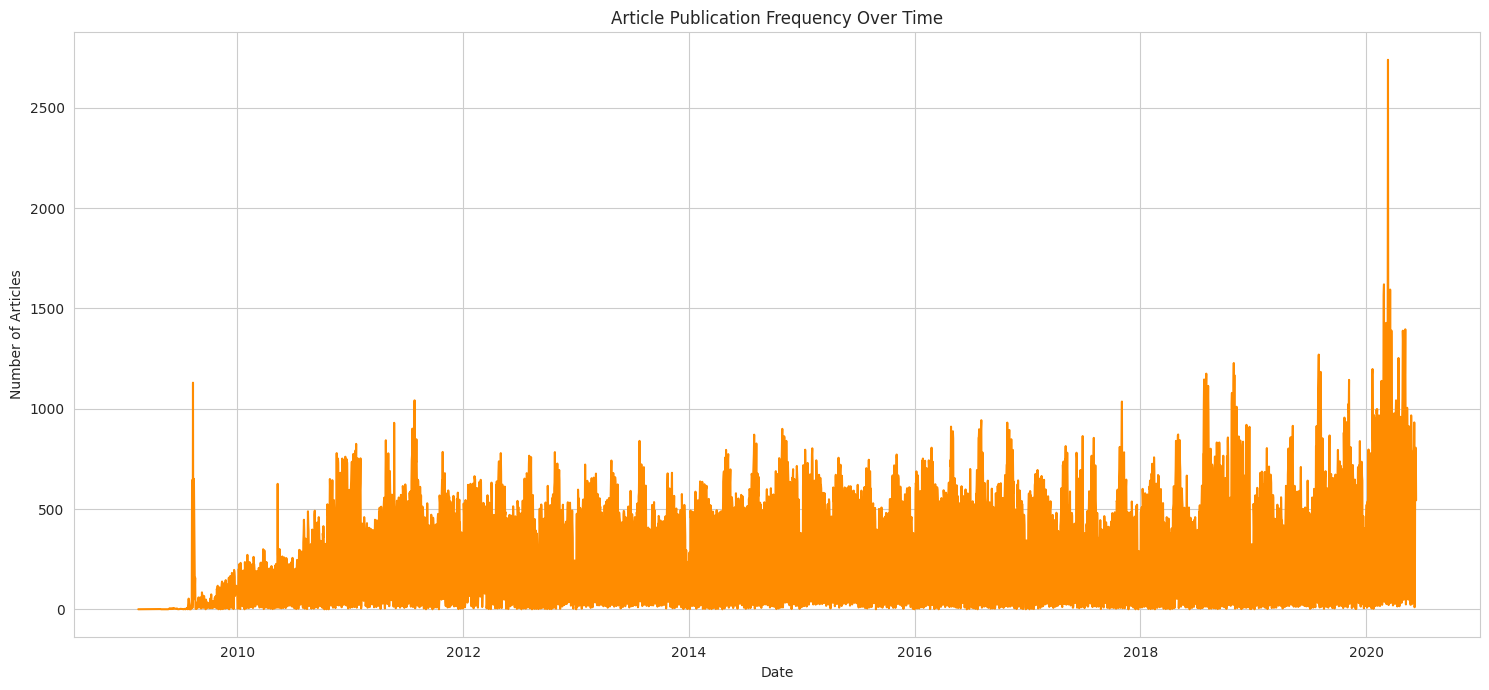


Articles by Day of the Week:
day_of_week
Monday       265164
Tuesday      296470
Wednesday    300940
Thursday     302595
Friday       217892
Saturday       7753
Sunday        16514
Name: count, dtype: int64


/tmp/ipykernel_10246/1501689420.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=articles_by_day_of_week.index, y=articles_by_day_of_week.values, palette='coolwarm')


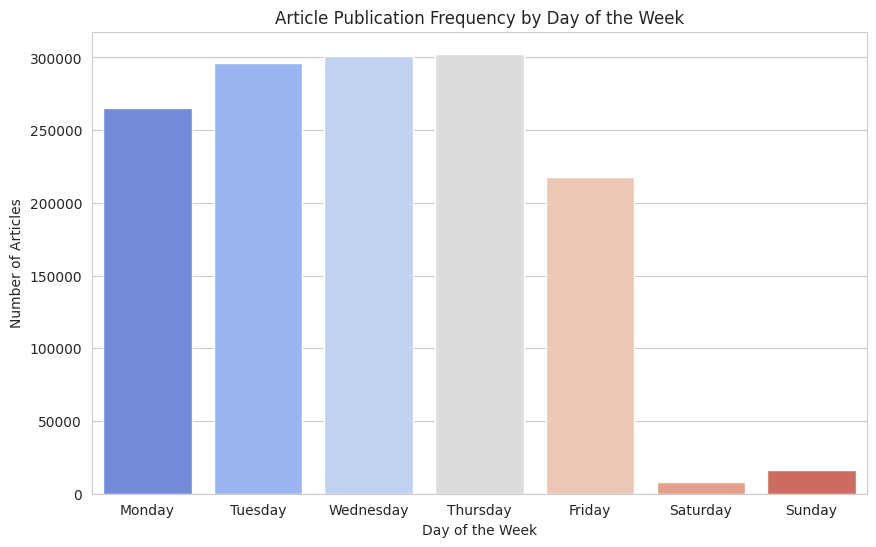


Articles by Hour of the Day (UTC-4 equivalent):
hour_of_day
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64


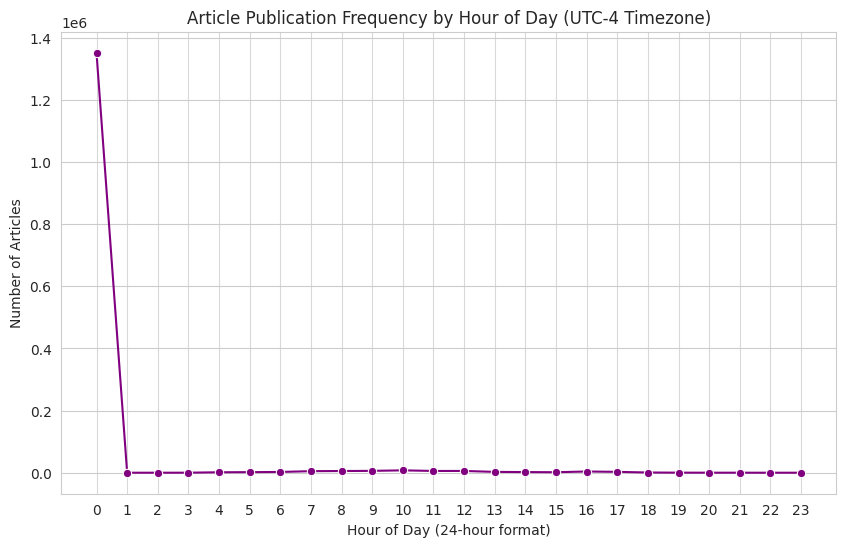

/tmp/ipykernel_10246/1501689420.py:62: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M') # Group by Year-Month



Articles by Month/Year (first 10 and last 10 entries):
year_month
2009-02       1
2009-04       3
2009-05      12
2009-06      40
2009-07      75
2009-08    3633
2009-09    1023
2009-10    1330
2009-11    2262
2009-12    3110
Freq: M, Name: count, dtype: int64
year_month
2019-09    12244
2019-10    16560
2019-11    14173
2019-12    11824
2020-01    16145
2020-02    18879
2020-03    24994
2020-04    20757
2020-05    17992
2020-06     6447
Freq: M, Name: count, dtype: int64


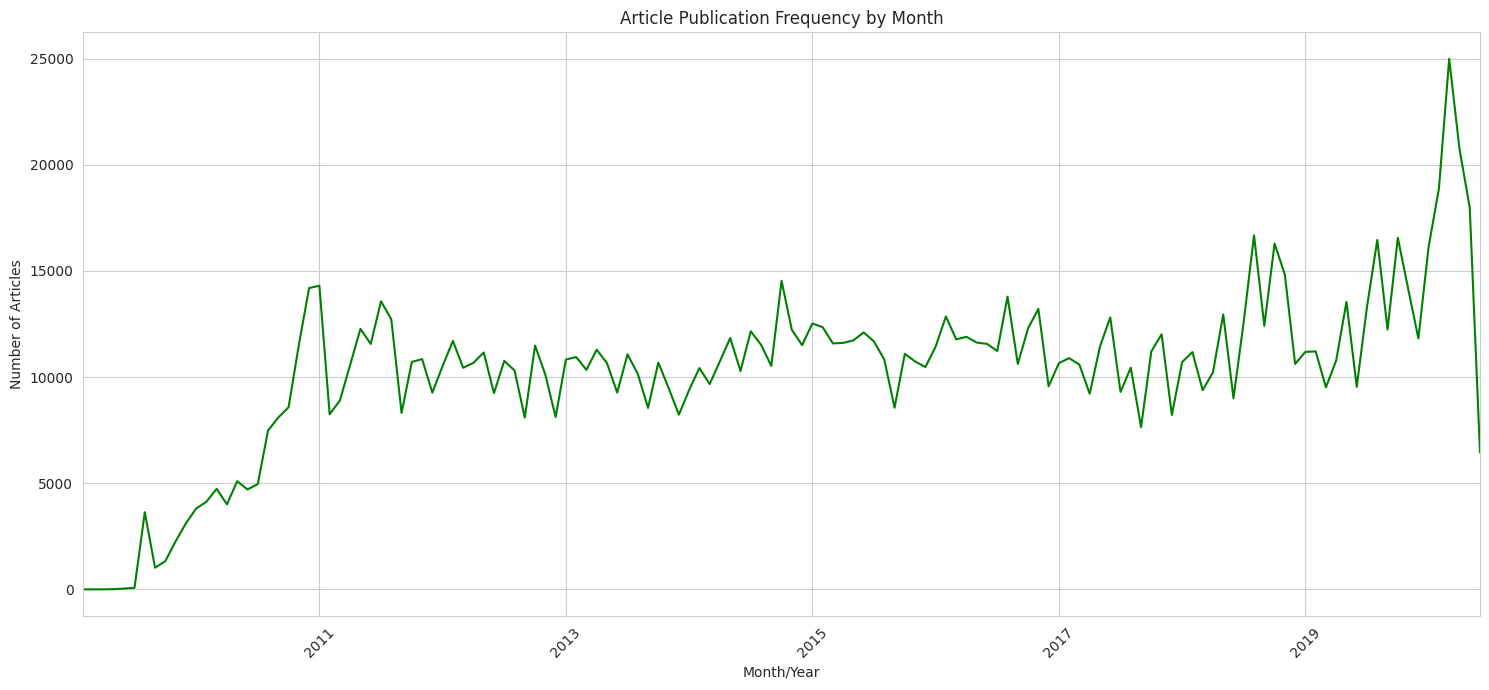

In [3]:
print("\n--- Starting Publication Date Analysis ---")
if 'date' in df.columns:
    try:
        # Convert the 'date' column to datetime objects.
        df['date'] = pd.to_datetime(df['date'], format='ISO8601')
        print("Successfully converted 'date' column to datetime objects.")

        # --- Analyze Articles per Day ---
        # Extract just the date part (yyyy-mm-dd) for daily frequency
        df['publication_day'] = df['date'].dt.date
        articles_per_day = df['publication_day'].value_counts().sort_index()

        print("\nArticles per Day (first 10 days with data):")
        print(articles_per_day.head(10))
        print("\nArticles per Day (last 10 days with data):")
        print(articles_per_day.tail(10))

        # Visualize articles per day over the entire period
        plt.figure(figsize=(15, 7))
        articles_per_day.plot(kind='line', color='darkorange')
        plt.title('Article Publication Frequency Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Articles')
        plt.tight_layout()
        plt.show()

        # --- Analyze by Day of the Week ---
        df['day_of_week'] = df['date'].dt.day_name()
        # Order days correctly for meaningful visualization
        articles_by_day_of_week = df['day_of_week'].value_counts().reindex([
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
        ])

        print("\nArticles by Day of the Week:")
        print(articles_by_day_of_week)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=articles_by_day_of_week.index, y=articles_by_day_of_week.values, palette='coolwarm')
        plt.title('Article Publication Frequency by Day of the Week')
        plt.xlabel('Day of the Week')
        plt.ylabel('Number of Articles')
        plt.show()

        # --- Analyze by Hour of the Day ---
        # Extract the hour from the datetime object (useful for intra-day patterns)
        df['hour_of_day'] = df['date'].dt.hour
        articles_by_hour = df['hour_of_day'].value_counts().sort_index()

        print("\nArticles by Hour of the Day (UTC-4 equivalent):")
        print(articles_by_hour)

        plt.figure(figsize=(10, 6))
        sns.lineplot(x=articles_by_hour.index, y=articles_by_hour.values, marker='o', color='purple')
        plt.title('Article Publication Frequency by Hour of Day (UTC-4 Timezone)')
        plt.xlabel('Hour of Day (24-hour format)')
        plt.ylabel('Number of Articles')
        plt.xticks(range(0, 24)) # Ensure all hours are displayed on the x-axis
        plt.grid(axis='x', alpha=0.75)
        plt.show()

        # --- Optional: Analyze by Month/Year for longer-term trends ---
        df['year_month'] = df['date'].dt.to_period('M') # Group by Year-Month
        articles_by_month = df['year_month'].value_counts().sort_index()

        print("\nArticles by Month/Year (first 10 and last 10 entries):")
        print(articles_by_month.head(10))
        print(articles_by_month.tail(10))

        plt.figure(figsize=(15, 7))
        articles_by_month.plot(kind='line', color='green')
        plt.title('Article Publication Frequency by Month')
        plt.xlabel('Month/Year')
        plt.ylabel('Number of Articles')
        plt.xticks(rotation=45) # Rotate labels for readability
        plt.tight_layout()
        plt.show()

    except KeyError:
        print("Error: 'date' column found but failed to convert to datetime. Check date format or column name.")
    except Exception as e:
        print(f"An unexpected error occurred during date analysis: {e}")
else:
    # If 'date' column is missing, inform the user
    print("Warning: 'date' column not found in the dataset. Skipping date analysis.")

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from gensim import corpora # For creating the dictionary
from gensim.models import LdaMulticore # For multi-core LDA training (recommended for large datasets)

nltk.download('stopwords') # Contains lists of common words to remove
nltk.download('wordnet')   # Needed for lemmatization (WordNet dictionary)
nltk.download('omw-1.4')   # Open Multilingual Wordnet, often a dependency for WordNet

[nltk_data] Downloading package stopwords to /home/ca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ca/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
print("\n--- Starting Text Preprocessing ---")

# Handle potential missing headlines (replace NaN with empty string)
df['headline'] = df['headline'].fillna('')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_for_gensim(text):
    """
    Cleans a single headline string and returns a list of cleaned words (tokens).
    """
    if not isinstance(text, str):
        return [] # Return empty list for non-string input

    text = text.lower()
    # Remove all non-alphabetic characters (keep only a-z and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split() # Split into words

    cleaned_words = []
    for word in words:
        # Filter out stop words and words shorter than 4 characters
        if word not in stop_words and len(word) > 3:
            cleaned_words.append(lemmatizer.lemmatize(word))
    return cleaned_words

# Apply the preprocessing function to the 'headline' column
# The result will be a list of lists of words (e.g., [['word1', 'word2'], ['word3', 'word4']])
processed_docs = df['headline'].apply(preprocess_for_gensim).tolist()

# Crucially, remove any documents that became empty after preprocessing
# An empty document would cause errors in Gensim's dictionary creation
processed_docs = [doc for doc in processed_docs if doc]

if not processed_docs:
    print("Error: No valid documents remaining after preprocessing. Check your data or preprocessing steps.")
    exit()

print(f"Total documents processed: {len(processed_docs)}")
print("\nExample Original Headline:")
print(df['headline'].iloc[4]) # Using index 4 as it's a good example from your sample
print("\nExample Cleaned Headline (as a list of words):")
print(processed_docs[4] if len(processed_docs) > 4 else "N/A - processed_docs too short")


--- Starting Text Preprocessing ---
Total documents processed: 55980

Example Original Headline:
B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88

Example Cleaned Headline (as a list of words):
['security', 'maintains', 'neutral', 'agilent', 'technology', 'raise', 'price', 'target']


In [7]:
print("\n--- Building Gensim Dictionary and Bag-of-Words Corpus ---")

# 1. Create the Gensim Dictionary
# This step builds the vocabulary and assigns unique IDs to each word.
dictionary = corpora.Dictionary(processed_docs)
print(f"Original dictionary size: {len(dictionary)} unique tokens.")

# 2. Filter out words that are too rare or too common
# This helps reduce noise and focus on more meaningful terms, especially for a large dataset.
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=10000)
print(f"Dictionary size after filtering extremes: {len(dictionary)} unique tokens.")

# 3. Create the Bag-of-Words (BoW) Corpus
# This converts each document (list of words) into its (word_id, count) representation
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(f"Size of the Bag-of-Words corpus: {len(bow_corpus)} documents.")

# Let's inspect a sample BOW document
sample_doc_index = 4 
if len(bow_corpus) > sample_doc_index:
    print(f"\nSample Bag-of-Words (ID, Count) for document {sample_doc_index}:")
    print(bow_corpus[sample_doc_index])
    print("Corresponding words for this sample BOW:")
    for word_id, count in bow_corpus[sample_doc_index]:
        # We use the dictionary to get the actual word string from its ID
        print(f"  - Word ID {word_id}: '{dictionary[word_id]}' appears {count} time(s).")
else:
    print("Cannot show sample BOW - corpus is too short.")


--- Building Gensim Dictionary and Bag-of-Words Corpus ---
Original dictionary size: 17228 unique tokens.
Dictionary size after filtering extremes: 2230 unique tokens.
Size of the Bag-of-Words corpus: 55980 documents.

Sample Bag-of-Words (ID, Count) for document 4:
[(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]
Corresponding words for this sample BOW:
  - Word ID 8: 'maintains' appears 1 time(s).
  - Word ID 9: 'neutral' appears 1 time(s).
  - Word ID 10: 'price' appears 1 time(s).
  - Word ID 11: 'raise' appears 1 time(s).
  - Word ID 12: 'security' appears 1 time(s).
  - Word ID 13: 'target' appears 1 time(s).
  - Word ID 14: 'technology' appears 1 time(s).


In [8]:
from gensim import models

print("\n--- Applying TF-IDF Transformation ---")

# 1. Create the TF-IDF model
# This "fits" the TF-IDF model by calculating the IDF values for all words based on your bow_corpus.
tfidf_model = models.TfidfModel(bow_corpus)

# 2. Apply the TF-IDF transformation to the entire corpus
# This converts the (ID, count) tuples in bow_corpus to (ID, TF-IDF_score) tuples.
corpus_tfidf = tfidf_model[bow_corpus]
print("TF-IDF transformation complete.")

# Let's inspect a sample TF-IDF transformed document
if corpus_tfidf:
    print("\nSample TF-IDF scores (ID, Score) for the first document:")
    # pprint provides a neatly formatted output for lists/dictionaries
    from pprint import pprint
    pprint(corpus_tfidf[0])

    print("\nCorresponding words with their TF-IDF scores for the first document:")
    for word_id, score in corpus_tfidf[0]:
        print(f"  - Word ID {word_id}: '{dictionary[word_id]}' has TF-IDF score {score:.4f}")
else:
    print("TF-IDF corpus is empty.")


--- Applying TF-IDF Transformation ---
TF-IDF transformation complete.

Sample TF-IDF scores (ID, Score) for the first document:
[(0, 0.7256567802061165), (1, 0.688056856183333)]

Corresponding words with their TF-IDF scores for the first document:
  - Word ID 0: 'friday' has TF-IDF score 0.7257
  - Word ID 1: 'high' has TF-IDF score 0.6881


In [ ]:
# before running this code make sure the above 
# four code cells have been executed successfully.)

print("\n--- Training LDA Topic Model with Gensim ---")

# --- Define LDA Model Parameters (Ensure these are defined!) ---
num_topics = 8  # Number of topics you want to discover (can be tuned)
chunksize = 2000 # Number of documents to process at a time
passes = 10     # Number of passes through the entire corpus
iterations = 50 # Number of iterations per document
random_state = 42 # For reproducible results

# --- Initialize and train the LDA model ---
# IMPORTANT: For LdaMulticore, 'alpha' and 'eta' cannot be 'auto'.
# We set them to 'symmetric' as a common practice.
lda_model = LdaMulticore(
    id2word=dictionary,  # Your Gensim dictionary
    num_topics=num_topics, # This variable is now defined here
    chunksize=chunksize,
    passes=passes,
    iterations=iterations,
    alpha='symmetric',
    eta='symmetric',
    random_state=random_state,
    eval_every=None
)

# Now, num_topics is defined and can be used in the print statement
print(f"LDA model training complete with {num_topics} topics.")

# --- Step 6: Display Most Frequent Words in the Model's Vocabulary ---
print("\n--- Most Frequent Words in the Model's Processed Vocabulary ---")

# Get corpus frequencies for each word from the dictionary
# dictionary.cfs is a dictionary mapping word_id to corpus_frequency
word_frequencies = sorted(dictionary.cfs.items(), key=lambda item: item[1], reverse=True)

# Display the top N most frequent words
n_most_frequent = 50 # You can adjust this number
print(f"Top {n_most_frequent} most frequent words:")

for word_id, count in word_frequencies[:n_most_frequent]:
    # Use dictionary[word_id] to get the actual word string
    print(f"  - '{dictionary[word_id]}' (Count: {count})")


--- Training LDA Topic Model with Gensim ---
LDA model training complete with 8 topics.

--- Most Frequent Words in the Model's Processed Vocabulary ---
Top 50 most frequent words:
  - 'price' (Count: 5572)
  - 'market' (Count: 5204)
  - 'target' (Count: 4695)
  - 'several' (Count: 4650)
  - 'sale' (Count: 4616)
  - 'lower' (Count: 4503)
  - 'higher' (Count: 4269)
  - 'estimate' (Count: 4090)
  - 'low' (Count: 3741)
  - 'session' (Count: 3486)
  - 'report' (Count: 3395)
  - 'maintains' (Count: 3266)
  - 'high' (Count: 3090)
  - 'yesterday' (Count: 3068)
  - 'thursday' (Count: 2927)
  - 'moving' (Count: 2867)
  - 'etf' (Count: 2749)
  - 'amid' (Count: 2672)
  - 'friday' (Count: 2634)
  - 'following' (Count: 2525)
  - 'biggest' (Count: 2359)
  - 'raise' (Count: 2303)
  - 'earnings' (Count: 2286)
  - 'beat' (Count: 2195)
  - 'update' (Count: 2166)
  - 'financial' (Count: 2120)
  - 'announces' (Count: 2108)
  - 'mover' (Count: 2092)
  - 'downgrade' (Count: 2074)
  - 'coronavirus' (Count: 

--- Preparing data for Statsmodels Seasonal Decomposition ---
Prepared daily time series data. Total days: 3333
Sample of daily counts (including potentially filled zeros):
2011-04-28    3
2011-04-29    2
2011-04-30    1
2011-05-01    1
2011-05-02    9
Freq: D, dtype: int64
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Freq: D, dtype: int64

--- Performing Seasonal Decomposition on the last 365 Days ---
Number of days in subset for decomposition: 365

--- Plotting Seasonal Decomposition Components (Subset) ---


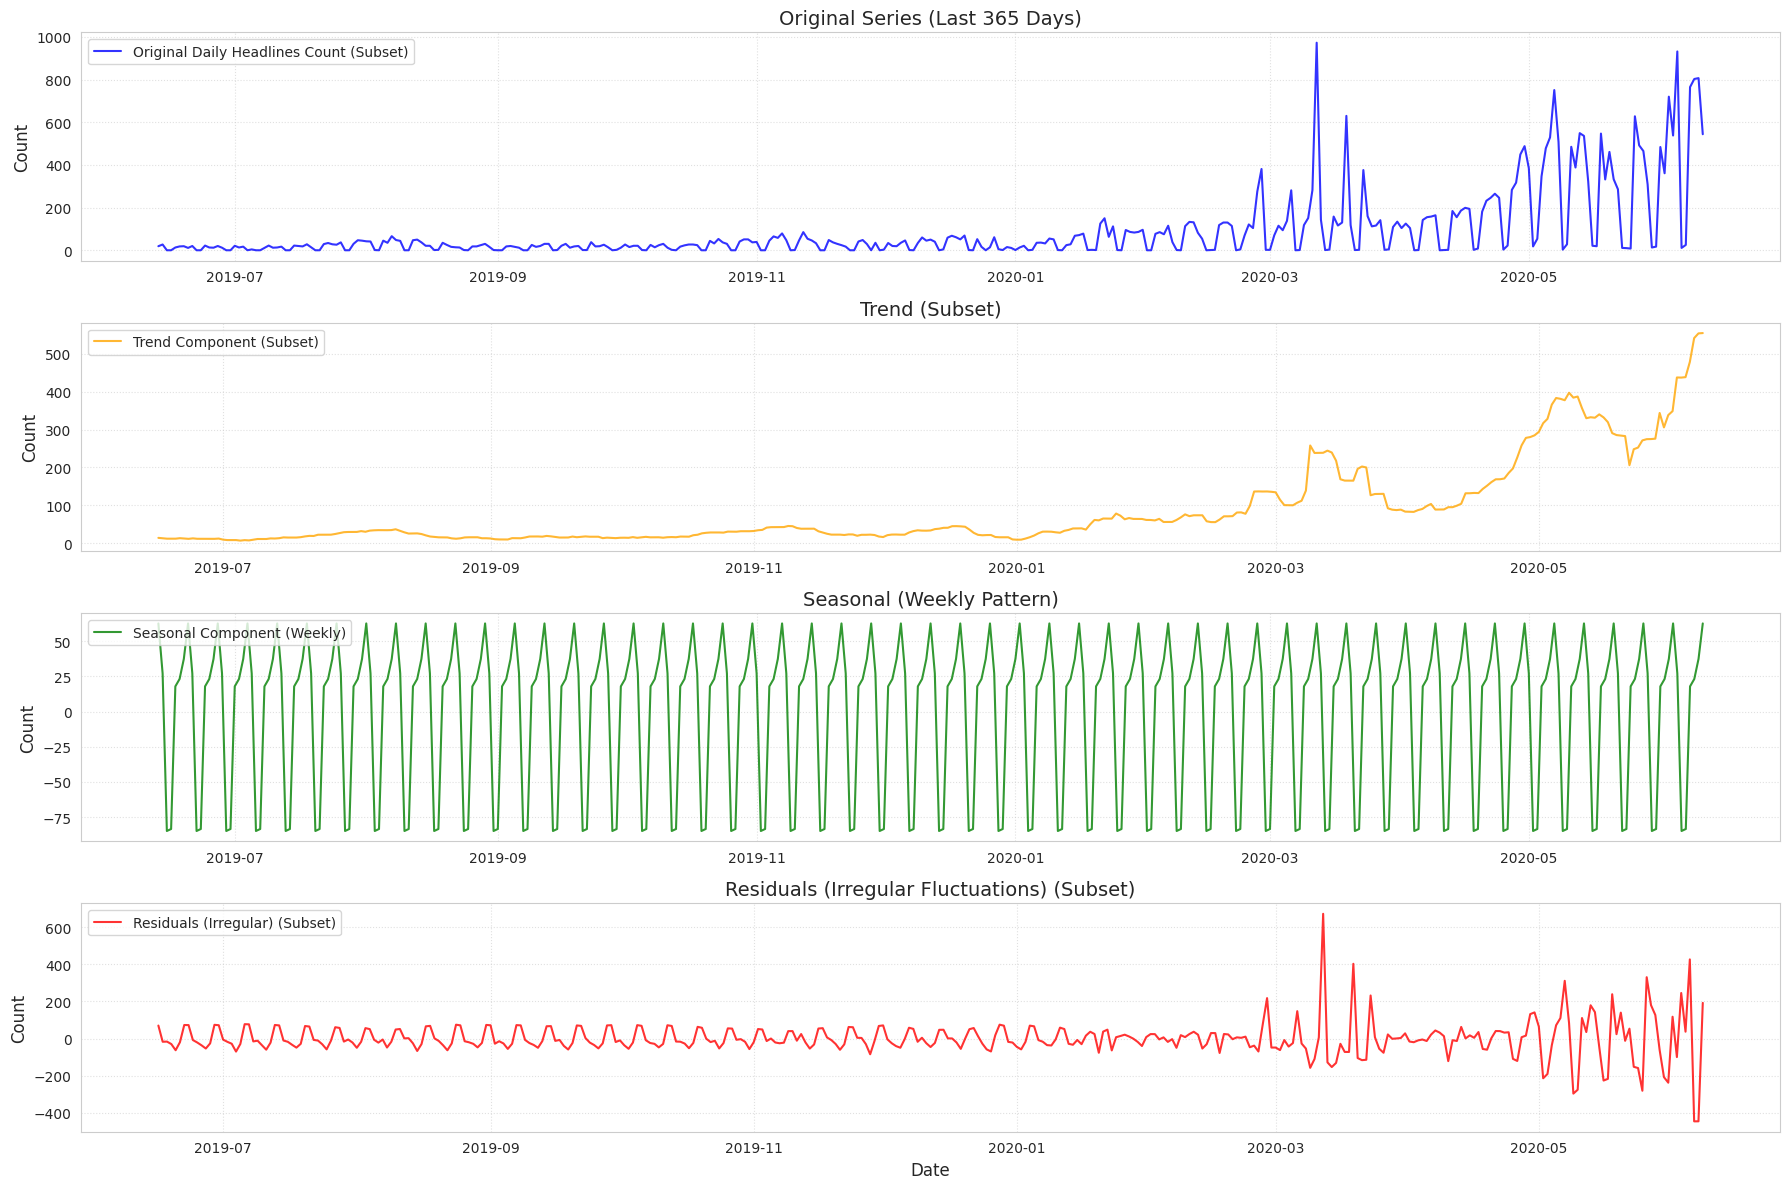

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
df.dropna(subset=['date'], inplace=True)

print("--- Preparing data for Statsmodels Seasonal Decomposition ---")

# 1. Count headlines per day
daily_headlines_counts = df.groupby(df['date'].dt.date).size()
daily_headlines_counts.index = pd.to_datetime(daily_headlines_counts.index)

# 2. Create a complete date range and reindex to fill missing days with 0
min_date = daily_headlines_counts.index.min()
max_date = daily_headlines_counts.index.max()
full_date_range = pd.date_range(start=min_date, end=max_date, freq='D')
time_series_data = daily_headlines_counts.reindex(full_date_range, fill_value=0)

print(f"Prepared daily time series data. Total days: {len(time_series_data)}")
print("Sample of daily counts (including potentially filled zeros):")
print(time_series_data.head())
print(time_series_data.tail())

# --- Define the number of days to analyze for decomposition ---
# Choose a number of days. 365 for roughly one year, 730 for two years, etc.
# One full year is usually sufficient to capture weekly seasonality.
N_DAYS_FOR_DECOMPOSITION = 365 # Example: Decompose the last 365 days (approx. 1 year)

# Select the subset of the time series data
# Using .tail() gets the most recent N_DAYS_FOR_DECOMPOSITION days.
time_series_data_subset = time_series_data.tail(N_DAYS_FOR_DECOMPOSITION)

print(f"\n--- Performing Seasonal Decomposition on the last {N_DAYS_FOR_DECOMPOSITION} Days ---")
print(f"Number of days in subset for decomposition: {len(time_series_data_subset)}")

if len(time_series_data_subset) > 0:
    # --- Perform Seasonal Decomposition on the SUBSET ---
    # model='additive'
    # period=7 for weekly seasonality on daily data (7 days in a week).
    decomposition_subset = seasonal_decompose(time_series_data_subset, model='additive', period=7)

    # --- Plotting the components ---
    print("\n--- Plotting Seasonal Decomposition Components (Subset) ---")
    plt.figure(figsize=(18, 12)) # Adjusted figure size for better visibility

    # Original Series Plot
    plt.subplot(411)
    plt.plot(time_series_data_subset, label='Original Daily Headlines Count (Subset)', color='blue', alpha=0.8)
    plt.title(f'Original Series (Last {N_DAYS_FOR_DECOMPOSITION} Days)', fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, linestyle=':', alpha=0.6)

    # Trend Component Plot
    plt.subplot(412)
    plt.plot(decomposition_subset.trend, label='Trend Component (Subset)', color='orange', alpha=0.8)
    plt.title('Trend (Subset)', fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, linestyle=':', alpha=0.6)

    # Seasonal Component Plot
    plt.subplot(413)
    plt.plot(decomposition_subset.seasonal, label='Seasonal Component (Weekly)', color='green', alpha=0.8)
    plt.title('Seasonal (Weekly Pattern)', fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, linestyle=':', alpha=0.6)

    # Residual/Irregular Component Plot
    plt.subplot(414)
    plt.plot(decomposition_subset.resid, label='Residuals (Irregular) (Subset)', color='red', alpha=0.8)
    plt.title('Residuals (Irregular Fluctuations) (Subset)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, linestyle=':', alpha=0.6)

    plt.tight_layout()
    plt.show()

else:
    print(f"Not enough data to analyze the last {N_DAYS_FOR_DECOMPOSITION} days. Please check your dataset's date range.")

--- Step 1: Identifying Top 10 Publishers ---

Top 10 Most Contributing Publishers:
normalized_publisher
benzinga newsdesk    14750
lisa levin           12408
etf professor         4362
paul quintaro         4212
benzinga newsdesk     3177
benzinga insights     2332
vick meyer            2128
charles gross         1790
hal lindon            1470
benzinga_newsdesk     1239
Name: count, dtype: int64


/tmp/ipykernel_4618/3202705202.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(top_n_publishers_plot).values, y=publisher_counts.head(top_n_publishers_plot).index, palette='Blues_d')


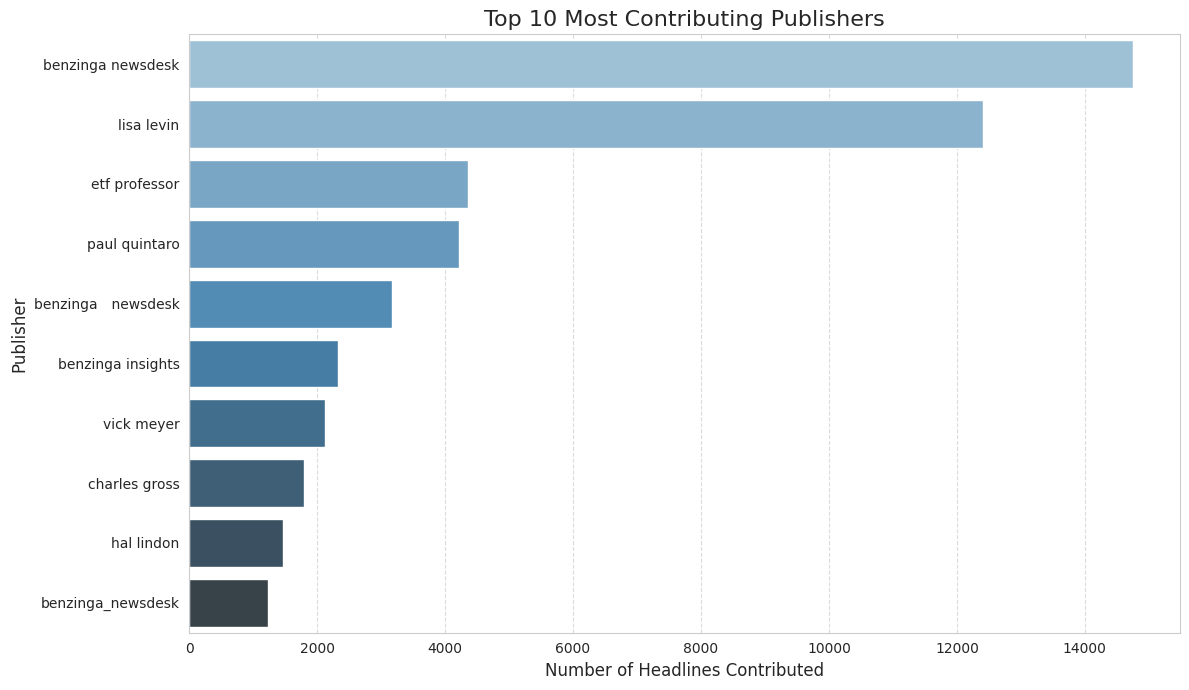


**Result of Step 1:** You now have a clear list and visualization of the publishers that contribute the most headlines to your dataset.


In [19]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora, models # Needed for dictionary, models (TFIDF, LDA)

# --- Assuming 'df' is loaded with 'headline', 'publisher', and 'date' columns ---
# If not, please ensure these steps are run first:
# df = pd.read_csv('your_raw_data.csv') # Replace with your actual file path
# df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
# df.dropna(subset=['date'], inplace=True) # Drop rows with missing dates

print("--- Step 1: Identifying Top 10 Publishers ---")

def normalize_publisher_name(publisher_name):
    """
    Normalizes a publisher name:
    - If it looks like an email address, extracts the domain.
    - Otherwise, returns the original name (converted to string).
    """
    if pd.isna(publisher_name):
        return "Unknown"
    publisher_name = str(publisher_name).strip().lower()
    if '@' in publisher_name:
        parts = publisher_name.split('@')
        if len(parts) > 1 and '.' in parts[-1]:
            return parts[-1]
    return publisher_name

# Apply the normalization function
df['normalized_publisher'] = df['publisher'].apply(normalize_publisher_name)

# Count contributions for each normalized publisher
publisher_counts = df['normalized_publisher'].value_counts()

# Display the top 10 publishers
print("\nTop 10 Most Contributing Publishers:")
print(publisher_counts.head(10))

# --- Visualize Top Publishers (Optional, but helpful) ---
plt.figure(figsize=(12, 7))
top_n_publishers_plot = 10 # Display top 10 for the plot
sns.barplot(x=publisher_counts.head(top_n_publishers_plot).values, y=publisher_counts.head(top_n_publishers_plot).index, palette='Blues_d')
plt.title(f'Top {top_n_publishers_plot} Most Contributing Publishers', fontsize=16)
plt.xlabel('Number of Headlines Contributed', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n**Result of Step 1:** You now have a clear list and visualization of the publishers that contribute the most headlines to your dataset.")


--- Step 2: Analyzing Publisher-Topic Distribution ---
Current df_for_corpus_current length: 55980
Current corpus_tfidf length: 55980


/tmp/ipykernel_4618/3767106532.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dominant_topic'].fillna(-1, inplace=True)



Total rows in original df: 55987
Rows with a dominant topic assigned: 55980
Rows where no dominant topic could be assigned: 7

Topic Distribution for Top Publishers (Proportions):
dominant_topic               0         1         2         3         4  \
normalized_publisher                                                     
benzinga newsdesk     0.110885  0.131163  0.134690  0.166294  0.138081   
lisa levin            0.224855  0.177869  0.105255  0.220745  0.079062   
etf professor         0.093557  0.132768  0.170832  0.098143  0.125201   
paul quintaro         0.130342  0.105888  0.131292  0.128917  0.100427   
benzinga newsdesk     0.095373  0.091911  0.188857  0.150456  0.197986   
benzinga insights     0.153087  0.155660  0.167238  0.125214  0.105060   
vick meyer            0.102444  0.117951  0.087406  0.274906  0.093515   
charles gross         0.122905  0.128492  0.149721  0.137430  0.126257   
hal lindon            0.120408  0.085034  0.163946  0.146259  0.125170   
benzi

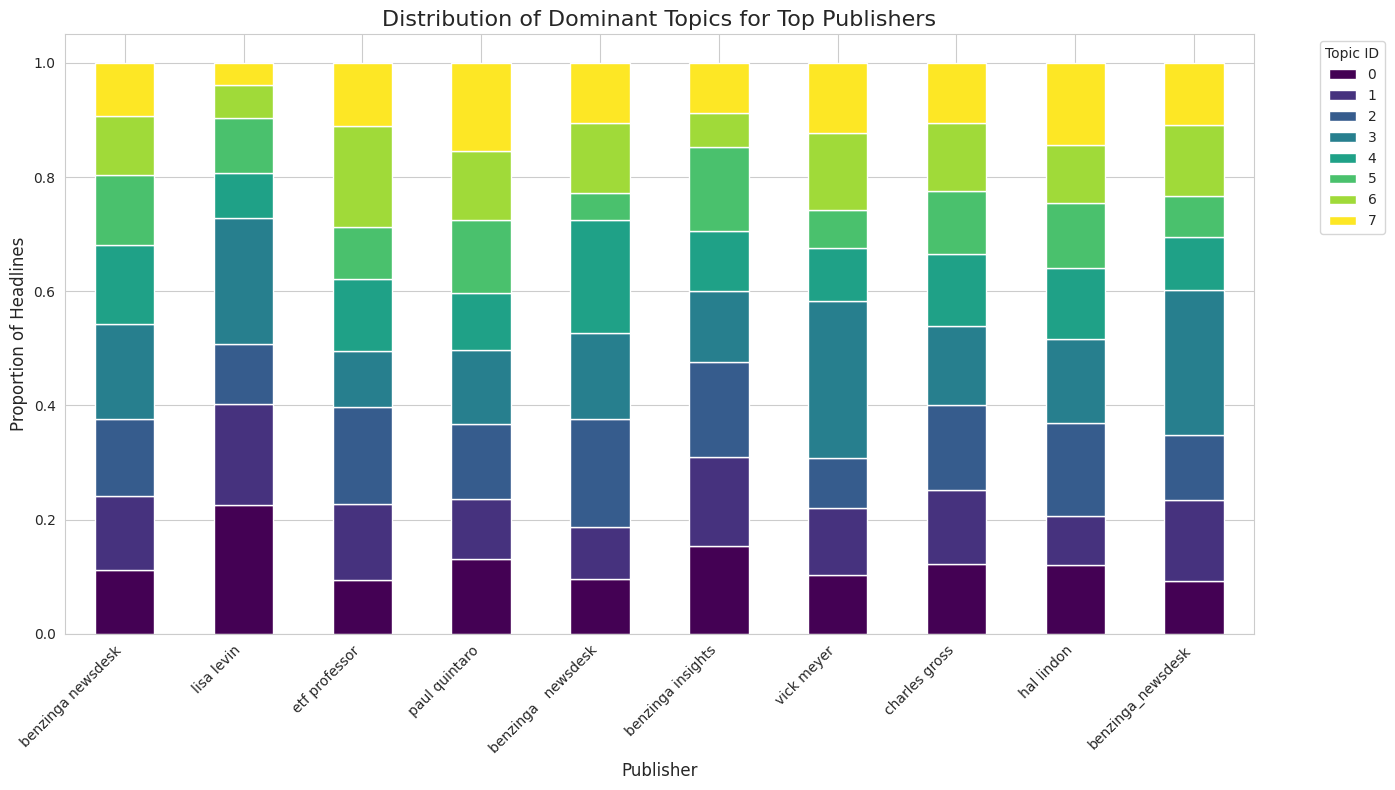


**Result of Step 2:** This stacked bar chart is your key to understanding the variety of news publishers cover.
  - Each bar represents a publisher.
  - The different colored segments within each bar show the **proportion** of that publisher's headlines assigned to a particular LDA topic.

**How to Correlate Words with Authors and Understand News Variety:**
1.  **Recall Topic Definitions:** To understand what 'Topic ID 0', 'Topic ID 1', etc., mean, you **must** refer back to the top words associated with each topic from your `lda_model.show_topics()` output.
    *For example, if your `lda_model.show_topics()` for Topic 0 shows words like 'stock', 'price', 'market', 'share', then **Topic 0 is likely about stock market movements.***
    *And if Topic 1 shows words like 'analyst', 'rating', 'target', 'maintain', then **Topic 1 is about analyst ratings.***

2.  **Examine Each Publisher's Bar:**
    * **Specialization:** If a publisher's bar is dominated by one or two large colored segment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# No need for gensim imports again, as variables are assumed to be defined.

print("\n--- Step 2: Analyzing Publisher-Topic Distribution ---")

# Re-applying preprocessing to get 'processed_headline_tokens' linked to 'df'
df['processed_headline_tokens'] = df['headline'].apply(preprocess_for_gensim)

# Create df_for_corpus again, linked to the original df's index
df_for_corpus_current = df[df['processed_headline_tokens'].apply(len) > 0].copy()

# Ensure dictionary and corpus_tfidf are built from df_for_corpus_current
# This is crucial for matching lengths for topic assignment
current_dictionary = corpora.Dictionary(df_for_corpus_current['processed_headline_tokens'])
current_dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=10000) # Use same filters as your LDA training
current_bow_corpus = [current_dictionary.doc2bow(doc) for doc in df_for_corpus_current['processed_headline_tokens']]
current_tfidf_model = models.TfidfModel(current_bow_corpus)
current_corpus_tfidf = current_tfidf_model[current_bow_corpus]

print(f"Current df_for_corpus_current length: {len(df_for_corpus_current)}")
print(f"Current corpus_tfidf length: {len(current_corpus_tfidf)}")


def get_dominant_topic_from_corpus(lda_model, doc_corpus):
    """
    Returns a list of dominant topic IDs for each document in the given corpus.
    """
    dominant_topics = []
    for i, row_list in enumerate(lda_model[doc_corpus]):
        if not row_list:
            dominant_topics.append(-1) # Placeholder for no dominant topic
        else:
            row_list = sorted(row_list, key=lambda x: x[1], reverse=True)
            dominant_topics.append(row_list[0][0])
    return dominant_topics

# Get dominant topics using the lda_model and the currently aligned corpus_tfidf
dominant_topics_list = get_dominant_topic_from_corpus(lda_model, current_corpus_tfidf)

# Create a Pandas Series using the index from df_for_corpus_current
dominant_topic_series = pd.Series(dominant_topics_list, index=df_for_corpus_current.index)

# Assign this Series back to the original 'df'.
# Pandas will align by index, putting dominant topics in the correct rows.
# For rows that were filtered out (i.e., not in df_for_corpus_current.index), 'dominant_topic' will be NaN.
df['dominant_topic'] = dominant_topic_series

# Fill NaN dominant_topics with a placeholder (-1) for documents that had no valid tokens
df['dominant_topic'].fillna(-1, inplace=True)
df['dominant_topic'] = df['dominant_topic'].astype(int) # Convert to integer type

print(f"\nTotal rows in original df: {len(df)}")
print(f"Rows with a dominant topic assigned: {df['dominant_topic'][df['dominant_topic'] != -1].count()}")
print(f"Rows where no dominant topic could be assigned: {df['dominant_topic'][df['dominant_topic'] == -1].count()}")

# Select the top 10 publishers identified in Step 1
top_publishers_list = publisher_counts.head(10).index.tolist()

# Filter the DataFrame to include only headlines from these top publishers
# AND where a topic was successfully assigned (dominant_topic != -1)
df_top_publishers_with_topics = df[
    (df['normalized_publisher'].isin(top_publishers_list)) &
    (df['dominant_topic'] != -1)
].copy()

# Calculate topic distribution for each of these top publishers
topic_distribution_by_publisher = pd.crosstab(
    df_top_publishers_with_topics['normalized_publisher'],
    df_top_publishers_with_topics['dominant_topic']
)

# Normalize the counts to get proportions (each row sums to 1)
topic_distribution_by_publisher_norm = topic_distribution_by_publisher.div(
    topic_distribution_by_publisher.sum(axis=1), axis=0
)

# Reorder publishers by their overall contribution (from Step 1)
# Ensure all top publishers are in the normalized data before reindexing
existing_top_publishers = [p for p in top_publishers_list if p in topic_distribution_by_publisher_norm.index]
topic_distribution_by_publisher_norm = topic_distribution_by_publisher_norm.loc[existing_top_publishers]

print("\nTopic Distribution for Top Publishers (Proportions):")
print(topic_distribution_by_publisher_norm)

# --- Visualize Publisher-Topic Distribution ---
plt.figure(figsize=(14, 8))
topic_distribution_by_publisher_norm.plot(kind='bar', stacked=True, cmap='viridis', ax=plt.gca())
plt.title('Distribution of Dominant Topics for Top Publishers', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Proportion of Headlines', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Topic ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\n**Result of Step 2:** This stacked bar chart is your key to understanding the variety of news publishers cover.")
print("  - Each bar represents a publisher.")
print("  - The different colored segments within each bar show the **proportion** of that publisher's headlines assigned to a particular LDA topic.")

print("\n**How to Correlate Words with Authors and Understand News Variety:**")
print("1.  **Recall Topic Definitions:** To understand what 'Topic ID 0', 'Topic ID 1', etc., mean, you **must** refer back to the top words associated with each topic from your `lda_model.show_topics()` output.")
print("    *For example, if your `lda_model.show_topics()` for Topic 0 shows words like 'stock', 'price', 'market', 'share', then **Topic 0 is likely about stock market movements.***")
print("    *And if Topic 1 shows words like 'analyst', 'rating', 'target', 'maintain', then **Topic 1 is about analyst ratings.***")
print("\n2.  **Examine Each Publisher's Bar:**")
print("    * **Specialization:** If a publisher's bar is dominated by one or two large colored segments (e.g., 80% Topic 0), it indicates they highly **specialize** in that type of news (e.g., 'stock market movements').")
print("    * **General Coverage:** If a publisher's bar has many smaller, diverse colored segments, it suggests they cover a **wider variety of news topics**.")
print("    * **Compare Publishers:** Look across the bars to see if different publishers have distinct topic profiles. Publisher 'A' might focus on 'Tech Earnings' (Topic X), while Publisher 'B' leans heavily into 'Macroeconomic Policy' (Topic Y).")
print("\nThis visual correlation directly tells you what **'kind of news'** each publisher is reporting, based on the underlying themes (topics) and their characteristic words. By matching the Topic IDs in the chart to your `lda_model.show_topics()` output, you can articulate the specific variety of news each publisher contributes.")